In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: EDA en Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama _Digital Currency_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/43748

In [3]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(43748, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [4]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'None'
Todas las características son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']
Las características categóricas son []
Las características numéricas son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']


In [5]:
# Impresión de las características
features

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,19.50,31.46,37.68,93.33,55.19,91.71,1426,46200,27,1122
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,17.36,27.30,31.57,94.07,54.33,82.97,1466,47666,25,1147
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,15.30,24.34,27.73,93.45,57.17,76.74,1406,49072,25,1172
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,10.18,16.20,18.90,92.64,52.21,59.62,1331,50403,27,1199


## Asignación 1 &#x1F625;

Plantee 2 preguntas que le parezcan interesantes a resolver con este dataset.

### Contexto

Este dataset es parte de un proyecto para visualizar la calidad del aire de Myanmar.

**City[String]**: 2 valores distintos. (Ciudades de Myanmar)  
**Center[String]**:  14 valores distintos. (Centro de medición)  
**Date[Date]**: 378 valores distintos. (Fecha de recolección)  
**Year[Numeric]**: 2 valores distintos. (Año de recolección)  
**Month[String]**: 12 valores distintos. (Mes de recolección)  
**Season[String]**: 3 valores distintos. (Temporada climática)      
**PM1_0[Numeric]**: 2430 valores distintos. (Partículas de tamaño $<1\mu m$, polvo, partículas de combustión, bacterias, virus, etc.)    
**PM2_5[Numeric]**: 2736 valores distintos. (Partículas de tamñao $<2.5\mu m$, partículas antropogénicas, emisiones de diesel)  
**PM10[Numeric]**: 2762 valores distintos. (Partículas de tamaño $<10\mu m$, partículas sólidas o líquidas, polvo, cenizas, etc.)  
**Temperature_F[Numeric]**: 1577 valores distintos. (Temperatura en grados Farenheit)   
**Humidity_%[Numeric]**: 2586 valores distintos. (Porcentaje de humedad)     
**AQI[Numeric]**: 2686 valores distintos. (Calidad de aire, a mayor el valor, mayor nivel de contaminación atmosférica, menores 100-satisfactoria, mayores a 100-insatisfactoria)     
**New_cases[Numeric]**: 87 valores distintos. (No hay documentación al respecto, son nuevos casos de enfermedades respiratorias)   
**Cumulativa_cases[Numeric]**: 168 valores distintos. (No hay documentación al respecto, casos acumulados de enfermedades respiratorias)   
**New_deaths[Numeric]**: 30 valores distintos. (No hay documentación al respecto, muertos de las enfermedades respiratorias)   
**Cumulative_deaths [Numeric]**: 59 valores distintos. (No hay documentación al respecto, muetes acumuladas de las enfermeades respiratorias)

### Exploración de los datos

In [6]:
features["Date"] = pd.to_datetime(features["Date"])

In [7]:
# Identificamos los valores nulos
print(features.isnull().sum())

City                 0
Center               0
Date                 0
Year                 0
Month                0
Season               0
PM1_0                0
PM2_5                0
PM10                 0
Temperature_F        0
Humidity_%           0
AQI                  0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


### Histogramas

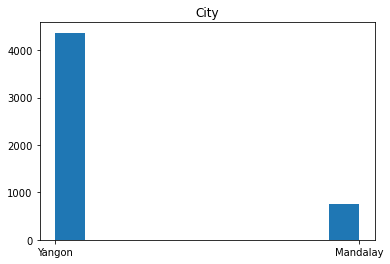

In [8]:
# Histograma de Ciudad
plt.hist(features.City)
plt.title("City")
plt.show()

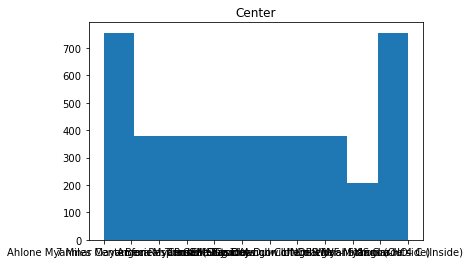

In [9]:
# Histograma de Center por Ciudad
city1 = features[features.City == "Yangon"]

plt.hist(city1.Center)
plt.title("Center")
plt.show()

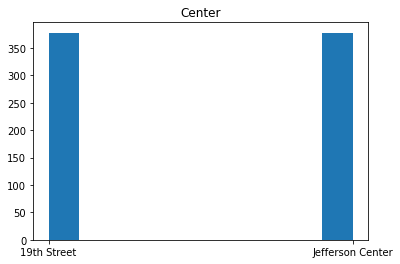

In [10]:
# Histograma de Center por Ciudad
city2 = features[features.City == "Mandalay"]

plt.hist(city2.Center)
plt.title("Center")
plt.show()

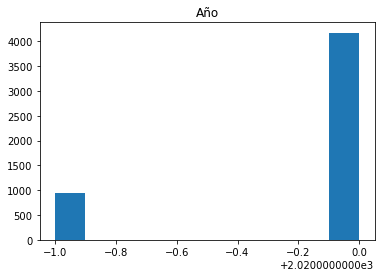

In [11]:
# Histograma por Año
plt.hist(features.Year)
plt.title("Año")
plt.show()

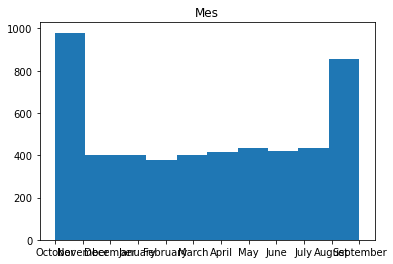

In [12]:
# Histograma por Mes
plt.hist(features.Month)
plt.title("Mes")
plt.show()

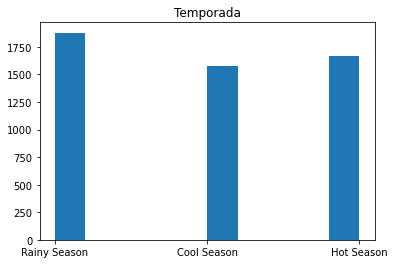

In [13]:
# Histograma por Temporada
plt.hist(features.Season)
plt.title("Temporada")
plt.show()

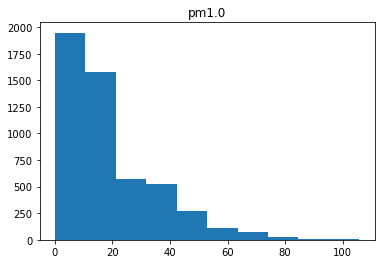

In [14]:
# Histograma por pm1.0
plt.hist(features.PM1_0)
plt.title("pm1.0")
plt.show()

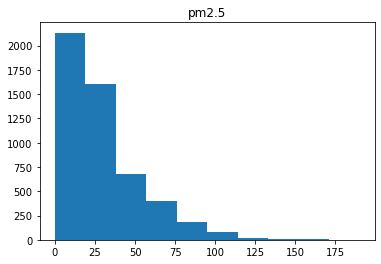

In [15]:
# Histograma por pm2.5
plt.hist(features.PM2_5)
plt.title("pm2.5")
plt.show()

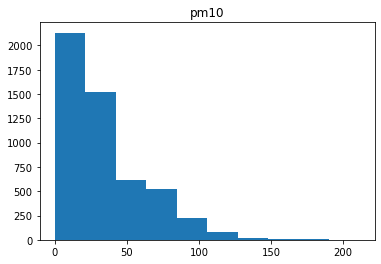

In [16]:
# Histograma por pm10
plt.hist(features.PM10)
plt.title("pm10")
plt.show()

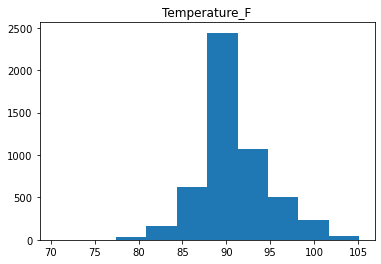

In [17]:
# Histograma por temperature_f
plt.hist(features.Temperature_F)
plt.title("Temperature_F")
plt.show()

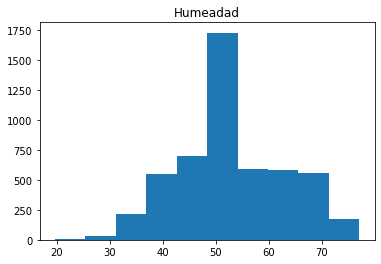

In [18]:
# Histograma por humidity
plt.hist(features["Humidity_%"])
plt.title("Humeadad")
plt.show()

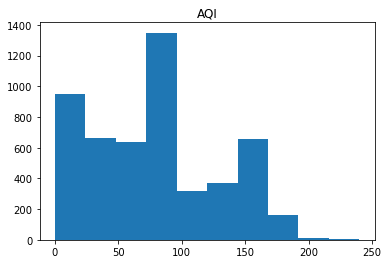

In [19]:
# Histograma por AQI
plt.hist(features.AQI)
plt.title("AQI")
plt.show()

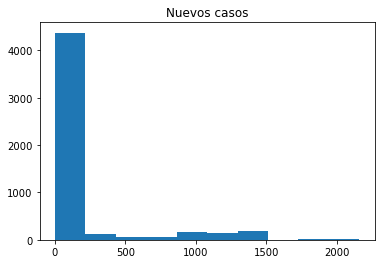

In [20]:
# Histograma por casos
plt.hist(features.New_cases)
plt.title("Nuevos casos")
plt.show()

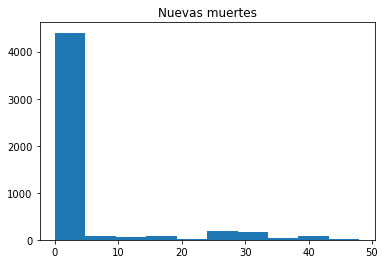

In [21]:
# Histograma por muerte
plt.hist(features.New_deaths)
plt.title("Nuevas muertes")
plt.show()

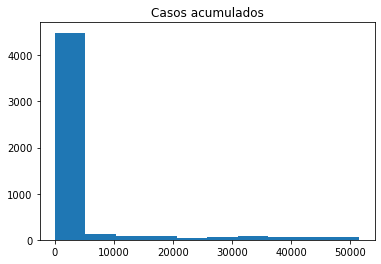

In [22]:
# Histograma por casos acumulados
plt.hist(features.Cumulative_cases)
plt.title("Casos acumulados")
plt.show()

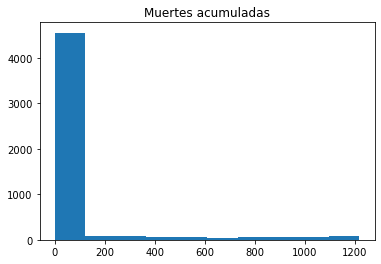

In [23]:
# Histograma por muertes acumuladas
plt.hist(features.Cumulative_deaths)
plt.title("Muertes acumuladas")
plt.show()

### Preguntas
#### 1. ¿Cuál es el comportamiento de las muertes acumuladas por ciudad?
#### 2. ¿La calidad del aire tiende a empeorar en 2020 en temporadas de calor?

## Asignación 2 &#x1F921;

Apoyado de las técnicas vistas en clase, realice un análisis exploratorio de datos (EDA) que le permita responder de manera guiada las preguntas planteadas anteriormente. Debe apoyarse de visualizaciones y métricas para respaldar sus respuestas.

### 1. ¿Cuál es el comportamiento de las muertes acumuladas por ciudad?

En el suspuesto de que que cada Centro tienen un valor distinto en muertes acumuladas para cada Ciudad, haremos un agrupamiento por fecha, en la cual se sumen los registros de muertes acumuladas.

In [24]:
features.City.unique()

array(['Yangon', 'Mandalay'], dtype=object)

In [25]:
# Dividimos los datos por ciudad
city_1 = features[features.City == "Yangon"]
city_2 = features[features.City == "Mandalay"]

In [26]:
# Realizamos los procesos necesarios para observar el comportamiento de muertes acumuladas.
city_1_groupbyDate = city1.groupby(['Date'])['Cumulative_deaths'].sum()
city_2_groupbyDate = city2.groupby(['Date'])['Cumulative_deaths'].sum()

In [27]:
# Corregimos algunos valores
for i in range(len(city_1_groupbyDate)):
    if i != 0:
        if city_1_groupbyDate[i] < city_1_groupbyDate[i - 1]:
            city_1_groupbyDate[i] = city_1_groupbyDate[i - 1] + city_1_groupbyDate[i]

#### Yangon

In [28]:
# Obtenemos una regresión lineal de la muertes acumuladas por ciudad
X =  np.array([[1, i] for i in range(len(city_1_groupbyDate))])
coef, res, _, _ = np.linalg.lstsq(X, city_1_groupbyDate, rcond=None)
prediction = X.dot(coef)

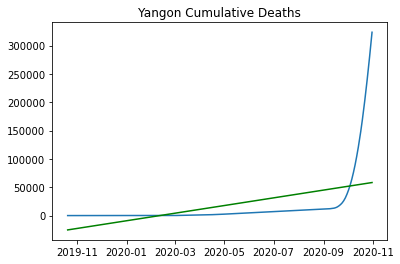

In [29]:
plt.plot(city_1_groupbyDate.index, city_1_groupbyDate)
plt.plot(city_1_groupbyDate.index, prediction, color = 'green')
plt.title("Yangon Cumulative Deaths")
plt.show()

#### Mandalay

In [30]:
# Obtenemos una regresión lineal de la muertes acumuladas por ciudad
X =  np.array([[1, i] for i in range(len(city_2_groupbyDate))])
coef, res, _, _ = np.linalg.lstsq(X, city_2_groupbyDate, rcond=None)
prediction = X.dot(coef)

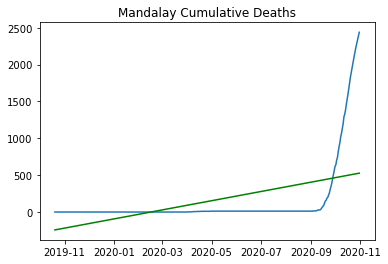

In [31]:
plt.plot(city_1_groupbyDate.index, city_2_groupbyDate)
plt.plot(city_1_groupbyDate.index, prediction, color = 'green')
plt.title("Mandalay Cumulative Deaths")
plt.show()

In [32]:
prediccion_global = list()
for i in range(len(city_1_groupbyDate)):
    prediccion_global.append(city_1_groupbyDate[i] + city_2_groupbyDate[2])
prediccion_global = np.array(prediccion_global)

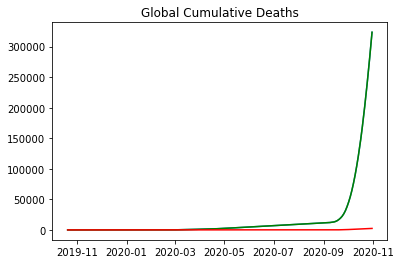

In [33]:
# Global
plt.plot(city_1_groupbyDate.index, prediccion_global)
plt.plot(city_1_groupbyDate.index, city_1_groupbyDate, color = 'green')
plt.plot(city_2_groupbyDate.index, city_2_groupbyDate, color = 'red')
plt.title("Global Cumulative Deaths")
plt.show()

### 2. ¿La calidad del aire tiende a empeorar en 2020 en temporadas de calor?

In [34]:
# Obtenemos solo el año 2020
year2 = features[features.Year == 2020]

In [35]:
aqi = year2.groupby(['Date']).AQI.mean()

In [36]:
hot = year2.Season.unique()[1]

In [41]:
year2.Season.unique()

array(['Cool Season', 'Hot Season', 'Rainy Season'], dtype=object)

In [37]:
hot_season = year2[year2.Season == hot]

In [38]:
aqi_season = hot_season.groupby(['Date']).AQI.mean()

In [39]:
X = np.array([[1, i] for i in range(len(aqi_season))])
coef, res, _, _ = np.linalg.lstsq(X, aqi_season, rcond=None)
prediction = X.dot(coef)

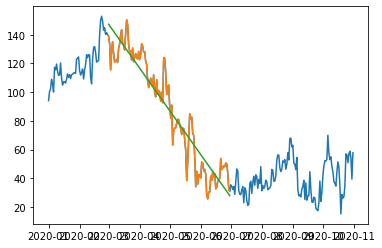

In [40]:
plt.plot(aqi.index, aqi)
plt.plot(aqi_season.index, aqi_season)
plt.plot(aqi_season.index, prediction)
plt.show()